In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)   

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
from IPython import display

import grafica as gr

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

### Ejemplos de la función AND

In [4]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])

In [5]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

### Prueba de dibujo

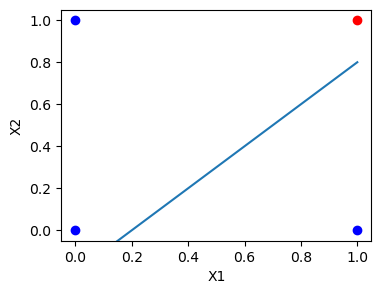

In [7]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([-1.0, 1.0])
b = 0.2

res= gr.dibuPtosRecta(X,T, W, b, ['X1','X2'])

### Hiperparámetros del perceptrón

In [9]:
MAX_ITE = 500
alfa = 0.2

### Entrenamiento del perceptrón

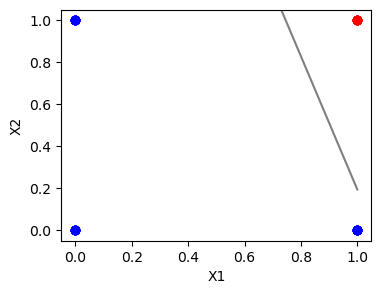

itereciones realizadas :  8


In [11]:
plt.clf()
nIn = X.shape[1]  # cantidad de pesos de entrada sin contar el sesgo

#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=nIn))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']
ph = 0  # es el manejador de la recta en el dibujo


#-- Ingresar los ejemplos de a uno hasta que los clasifique correctamente 
#   o hasta que se hayan realizado MAX_ITE iteraciones

ite = 0
cambios = 1
while (ite < MAX_ITE) and (cambios>0):
    cambios = 0
    # ingresar el ejemplo y modificar W y b
    for e in range(len(T)):
        neta = W[0]* X[e,0] + W[1]*X[e,1] + b
        y = int(neta > 0)

        if (T[e]!=y):
            cambios = cambios + 1
            W[0] = W[0] + alfa * (T[e]-y) * X[e,0]
            W[1] = W[1] + alfa * (T[e]-y) * X[e,1]
            b = b + alfa * (T[e]-y) * 1
            
    errores.append(cambios)
    ph = gr.dibuPtosRecta(X,T, W, b, ['X1','X2'], ph)
    ite = ite + 1
print("itereciones realizadas : ", ite)    

### Pesos obtenidos luego del entrenamiento

In [13]:
print("W = ", W)
print("b = ", b)

W =  [0.50460513 0.15918704]
b =  -0.5355072597047822


### Cantidad de errores por iteración

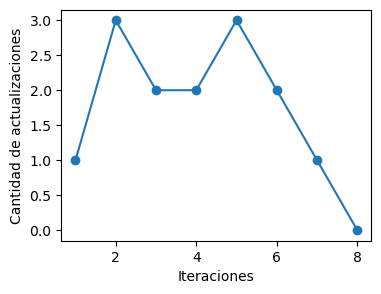

In [15]:
plt.clf()
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()